Posterior probability of H0 (fair coin): 0.5656
Posterior probability of H1 (biased coin): 0.4344


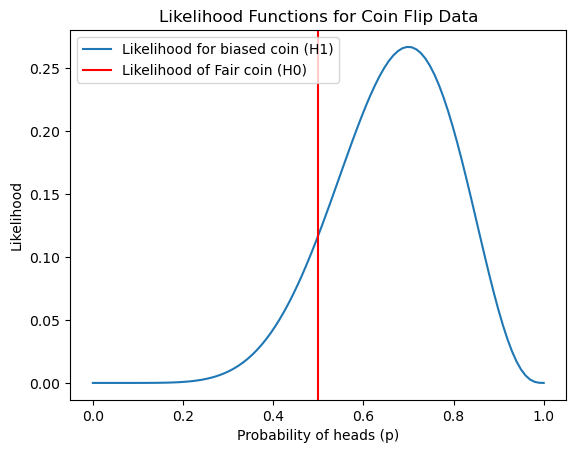

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Step 1: 
# We intially assume equal probability of coin being fair or biased since
# we have not seen the data yet i.e. probability of null or alternate 
# being true is equal.
prior_h0 = 0.5 # Prior probability that the coin is fair
prior_h1 = 0.5 # Prior probability that the coin is biased

# Step 2: As explained - below is what we observe 7 heads in 10 flips (data D)
observed_heads = 7
total_flips = 10

# Now lets compute the likelihood of null hypothesis conditional on 
# this is where discussion related to binomial distribution mentioned above is
# helpful
likelihood_h0 = binom.pmf(observed_heads, total_flips, 0.5)

# computing likelihood of alternate hypothesis is slightly tricky. 
# here we assume that probaiblity of heads could be anything between 0 and 1.
# but not .5 (why?)
# we compute the mean likelihood given alternate hypothesis is true by 
# computing the probability mass function value over the range p and taking
# mean of that
p_values = np.linspace(0, 1, 100)
likelihood_h1 = np.mean([binom.pmf(observed_heads, total_flips, p) 
                        for p in p_values])

# Let us now compute the marginal likelihood of observation which would be 
# weighted sum of likelihoods where weights are probability of each 
# hypothesis.
marginal_likelihood = (likelihood_h0 * prior_h0) + (likelihood_h1 * prior_h1)

# Now we can compute the posterior probabilities using definitons above.
posterior_h0_explicit = (likelihood_h0 * prior_h0) / marginal_likelihood
posterior_h1_explicit = (likelihood_h1 * prior_h1) / marginal_likelihood

# Step 4: Output the results
print(f"Posterior probability of H0 (fair coin): {posterior_h0_explicit:.4f}")
print(f"Posterior probability of H1 (biased coin): {posterior_h1_explicit:.4f}")
# Plotting the likelihood functions
plt.plot(p_values, [binom.pmf(observed_heads, total_flips, p) for p in p_values], label='Likelihood for biased coin (H1)')
plt.axvline(0.5, color='r', linestyle='-', label='Likelihood of Fair coin (H0)')
plt.xlabel('Probability of heads (p)')
plt.ylabel('Likelihood')
plt.legend()
plt.title('Likelihood Functions for Coin Flip Data')
plt.show()

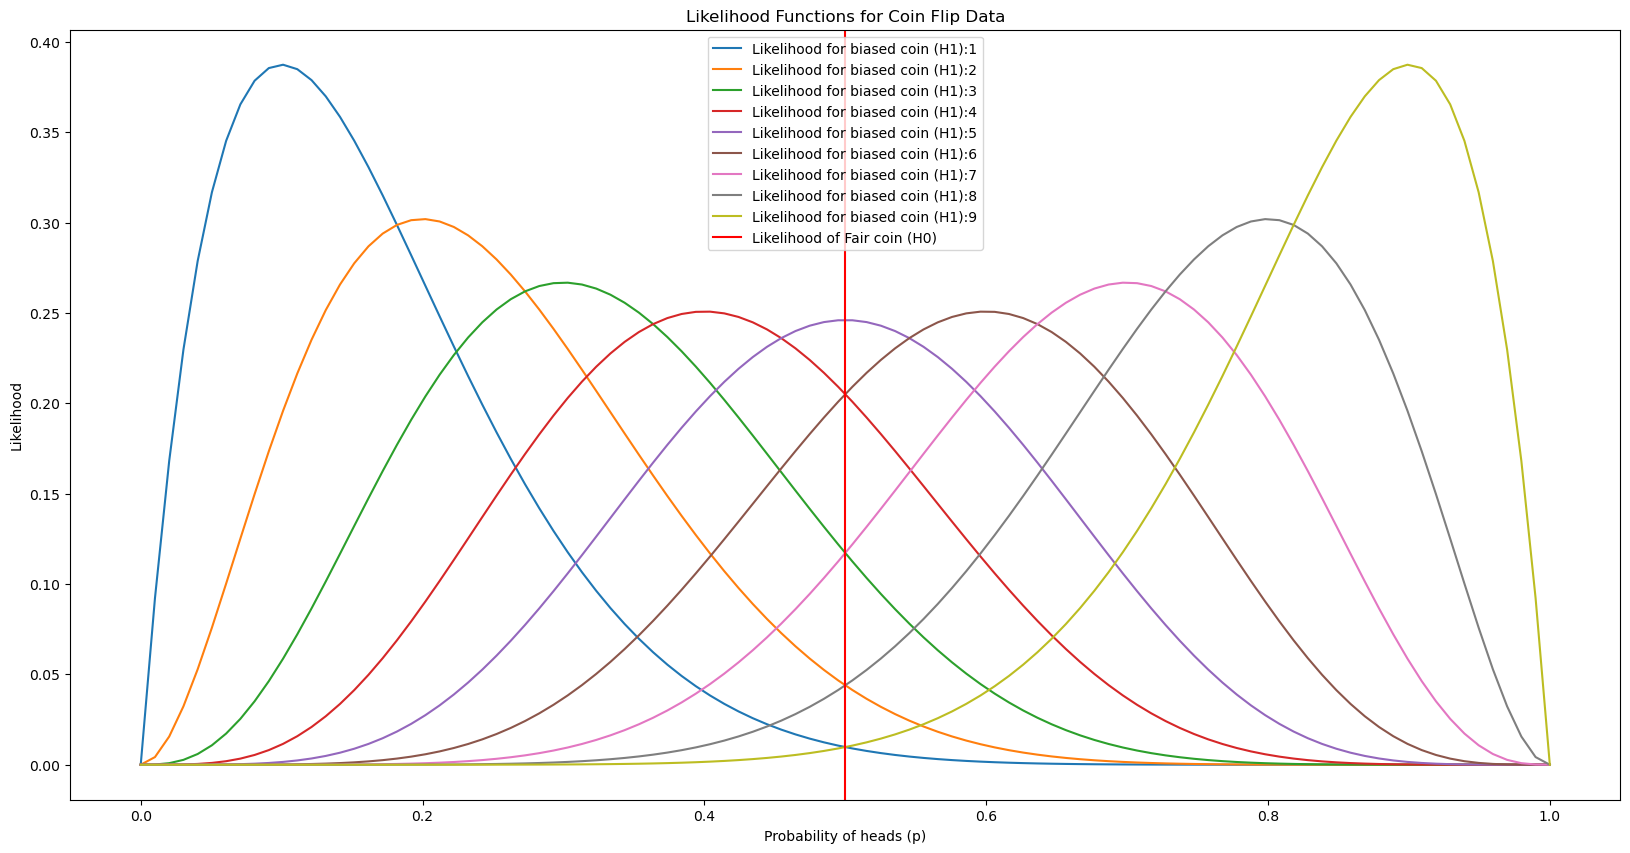

In [38]:
plt.figure(figsize=(20,10))
for observed_heads in range(1,total_flips): 
    plt.plot(p_values, [binom.pmf(observed_heads, total_flips, p) for p in p_values], 
             label='Likelihood for biased coin (H1):{}'.format(observed_heads))
    plt.xlabel('Probability of heads (p)')
    plt.ylabel('Likelihood')
    plt.title('Likelihood Functions for Coin Flip Data')
    
plt.axvline(0.5, color='r', linestyle='-', label='Likelihood of Fair coin (H0)')
plt.legend()
plt.show()

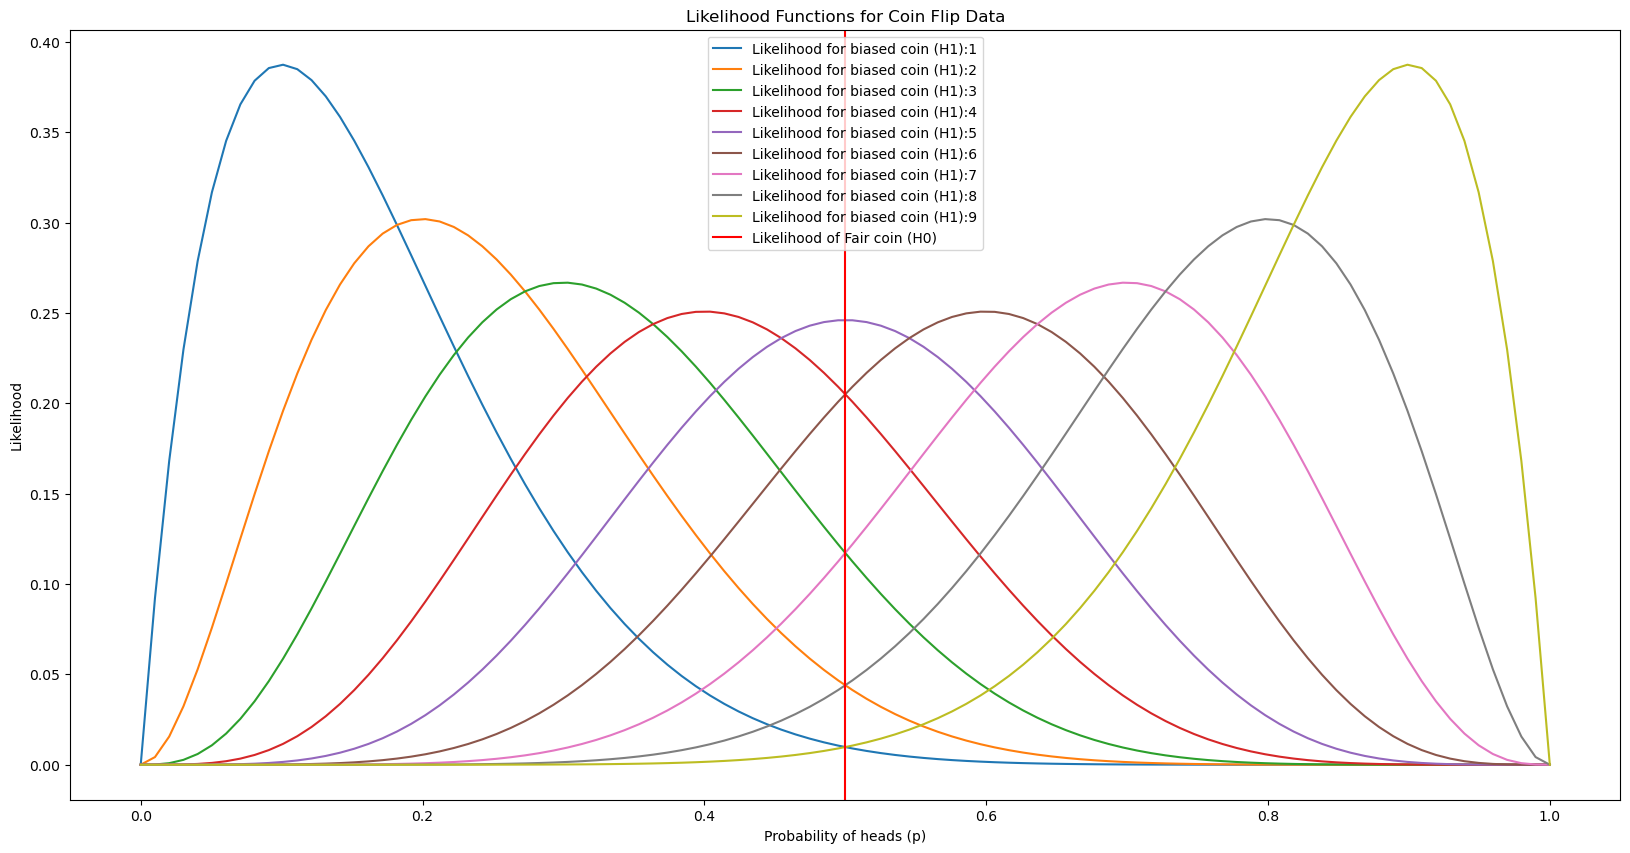

,Posterior probability of H0 (fair coin),Posterior probability of H1 (biased coin)
1,0.10,0.90
2,0.33,0.67
3,0.57,0.43
4,0.69,0.31
5,0.73,0.27
6,0.69,0.31
7,0.57,0.43
8,0.33,0.67
9,0.10,0.90


In [50]:
plt.figure(figsize=(20,10))
for observed_heads in range(1,total_flips): 
    plt.plot(p_values, [binom.pmf(observed_heads, total_flips, p) for p in p_values], 
             label='Likelihood for biased coin (H1):{}'.format(observed_heads))
    plt.xlabel('Probability of heads (p)')
    plt.ylabel('Likelihood')
    plt.title('Likelihood Functions for Coin Flip Data')
    
plt.axvline(0.5, color='r', linestyle='-', label='Likelihood of Fair coin (H0)')
plt.legend()
plt.show()


h0 = {}
h1 = {}

for observed_heads in range(1,total_flips): 
    total_flips = 10

    # Now lets compute the likelihood of null hypothesis conditional on 
    # this is where discussion related to binomial distribution mentioned above is
    # helpful
    likelihood_h0 = binom.pmf(observed_heads, total_flips, 0.5)

    # computing likelihood of alternate hypothesis is slightly tricky. 
    # here we assume that probaiblity of heads could be anything between 0 and 1.
    # but not .5 (why?)
    # we compute the mean likelihood given alternate hypothesis is true by 
    # computing the probability mass function value over the range p and taking
    # mean of that
    p_values = np.linspace(0, 1, 100)
    likelihood_h1 = np.mean([binom.pmf(observed_heads, total_flips, p) 
                            for p in p_values])

    # Let us now compute the marginal likelihood of observation which would be 
    # weighted sum of likelihoods where weights are probability of each 
    # hypothesis.
    marginal_likelihood = (likelihood_h0 * prior_h0) + (likelihood_h1 * prior_h1)

    # Now we can compute the posterior probabilities using definitons above.
    posterior_h0_explicit = (likelihood_h0 * prior_h0) / marginal_likelihood
    posterior_h1_explicit = (likelihood_h1 * prior_h1) / marginal_likelihood
    
    h0[observed_heads] = posterior_h0_explicit
    h1[observed_heads] = posterior_h1_explicit
    
import pandas as pd 
    
df_results = pd.DataFrame({'Posterior probability of H0 (fair coin)':h0,
              'Posterior probability of H1 (biased coin)':h1}).round(2)

df_results

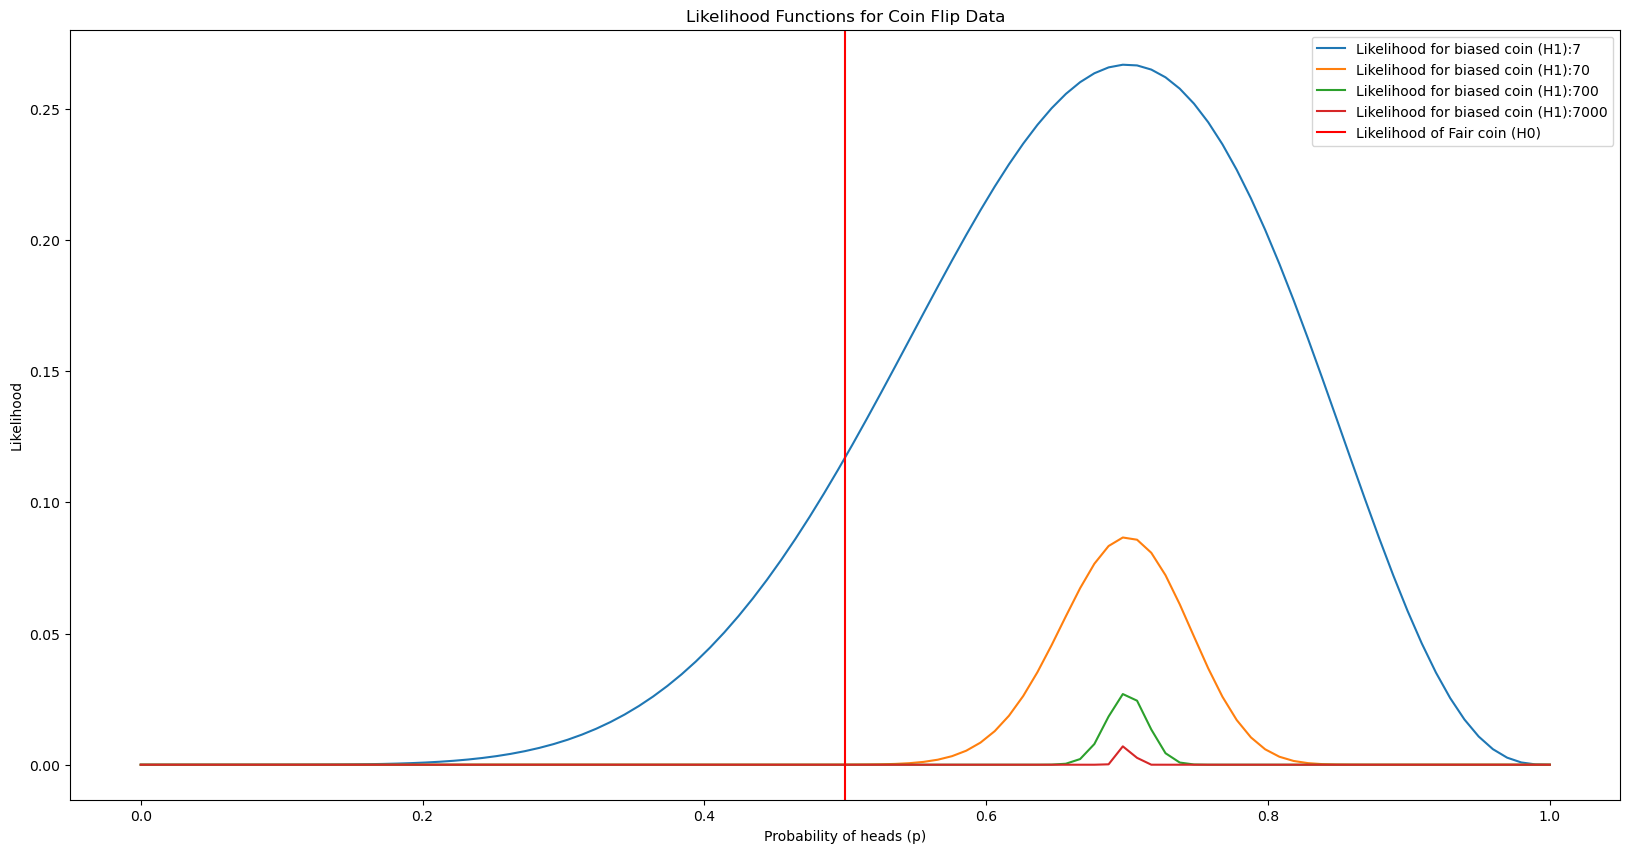

,Posterior probability of H0 (fair coin),Posterior probability of H1 (biased coin)
7,0.57,0.43
70,0.00,1.00
700,0.00,1.00
7000,0.00,1.00


In [51]:
plt.figure(figsize=(20,10))
for observed_heads,total_flips in zip([7,70,700,7000],[10,100,1000,10000]): 
    plt.plot(p_values, [binom.pmf(observed_heads, total_flips, p) for p in p_values], 
             label='Likelihood for biased coin (H1):{}'.format(observed_heads))
    plt.xlabel('Probability of heads (p)')
    plt.ylabel('Likelihood')
    plt.title('Likelihood Functions for Coin Flip Data')
    
plt.axvline(0.5, color='r', linestyle='-', label='Likelihood of Fair coin (H0)')
plt.legend()
plt.show()


h0 = {}
h1 = {}

for observed_heads,total_flips in zip([7,70,700,7000],[10,100,1000,10000]): 

    # Now lets compute the likelihood of null hypothesis conditional on 
    # this is where discussion related to binomial distribution mentioned above is
    # helpful
    likelihood_h0 = binom.pmf(observed_heads, total_flips, 0.5)

    # computing likelihood of alternate hypothesis is slightly tricky. 
    # here we assume that probaiblity of heads could be anything between 0 and 1.
    # but not .5 (why?)
    # we compute the mean likelihood given alternate hypothesis is true by 
    # computing the probability mass function value over the range p and taking
    # mean of that
    p_values = np.linspace(0, 1, 100)
    likelihood_h1 = np.mean([binom.pmf(observed_heads, total_flips, p) 
                            for p in p_values])

    # Let us now compute the marginal likelihood of observation which would be 
    # weighted sum of likelihoods where weights are probability of each 
    # hypothesis.
    marginal_likelihood = (likelihood_h0 * prior_h0) + (likelihood_h1 * prior_h1)

    # Now we can compute the posterior probabilities using definitons above.
    posterior_h0_explicit = (likelihood_h0 * prior_h0) / marginal_likelihood
    posterior_h1_explicit = (likelihood_h1 * prior_h1) / marginal_likelihood
    
    h0[observed_heads] = posterior_h0_explicit
    h1[observed_heads] = posterior_h1_explicit
    
import pandas as pd 
    
df_results = pd.DataFrame({'Posterior probability of H0 (fair coin)':h0,
              'Posterior probability of H1 (biased coin)':h1}).round(2)

df_results

In [59]:
h0 = {}
h1 = {}

for prior_h1 in [.2,.3,.5,.7,.8]: 
    observed_heads=7
    total_flips = 10
    prior_h0=1-prior_h1

    # Now lets compute the likelihood of null hypothesis conditional on 
    # this is where discussion related to binomial distribution mentioned above is
    # helpful
    likelihood_h0 = binom.pmf(observed_heads, total_flips, 0.5)

    # computing likelihood of alternate hypothesis is slightly tricky. 
    # here we assume that probaiblity of heads could be anything between 0 and 1.
    # but not .5 (why?)
    # we compute the mean likelihood given alternate hypothesis is true by 
    # computing the probability mass function value over the range p and taking
    # mean of that
    p_values = np.linspace(0, 1, 100)
    likelihood_h1 = np.mean([binom.pmf(observed_heads, total_flips, p) 
                            for p in p_values])

    # Let us now compute the marginal likelihood of observation which would be 
    # weighted sum of likelihoods where weights are probability of each 
    # hypothesis.
    marginal_likelihood = (likelihood_h0 * prior_h0) + (likelihood_h1 * prior_h1)

    # Now we can compute the posterior probabilities using definitons above.
    posterior_h0_explicit = (likelihood_h0 * prior_h0) / marginal_likelihood
    posterior_h1_explicit = (likelihood_h1 * prior_h1) / marginal_likelihood
    
    h0[prior_h1] = posterior_h0_explicit
    h1[prior_h1] = posterior_h1_explicit
    
import pandas as pd 
    
df_results = pd.DataFrame({'Posterior probability of H0 (fair coin)':h0,
              'Posterior probability of H1 (biased coin)':h1}).round(2)

df_results

,Posterior probability of H0 (fair coin),Posterior probability of H1 (biased coin)
0.2,0.84,0.16
0.3,0.75,0.25
0.5,0.57,0.43
0.7,0.36,0.64
0.8,0.25,0.75
